# Exercise 1: Sampling

In [2]:
#import the necessary libraries for plotting
import numpy as np
import matplotlib.pyplot as plt
import csv



### Exercise 1.1- Sampling random points within D- dimensional domains by hit and miss
For the random number generation see "exercise1.c", with the results saved to data.csv, which are  then plotted below.

#### A)  Sampling uniformly from a rectangle with the edges [a,b], [c,d]

as one can see in Fig 1, the uniform sampling (in this case N= 1000  in [-2,2]x[-1.5,1.5]) seems to have been sucessful.

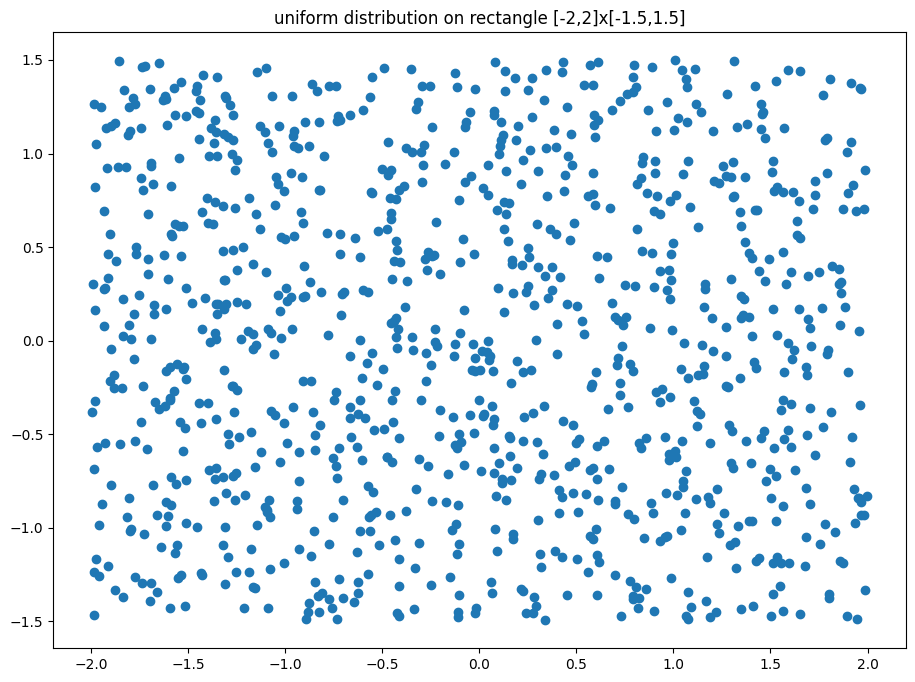

In [3]:
#read in the data from csv file
data = []
with open('data1.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row).astype('float64'))
x,y, x_circle, y_circle,rec,circle,N=data    

fig,ax =plt.subplots(1,1,figsize=(11,8))
ax.set_title("uniform distribution on rectangle [-2,2]x[-1.5,1.5]")
ax.scatter(x,y)
#print(y)

#### B ) Using the Hit and Miss Method for estimating the Area of the rectangle, and also of a unit disk withing the rectangle
The hit and miss method was implimented in c as described in the lecture, and tested for different numbers of sampled points.
In the case of estimating the area of the whole rectangle, it is impossible to miss the area, and thus the estiamted area is always completely correct.

In Fig. 3, one can see the distribution of hits and misses for the more interesting case of estimating the area of a unit circle around the origin within the rectangle.
The true area of a unit disk is $A = \pi$. Even for small  n (eg. N=10) the Area estimate by hit and miss is surprisingly good. again, one can see that the Area estimate converges to the true value.



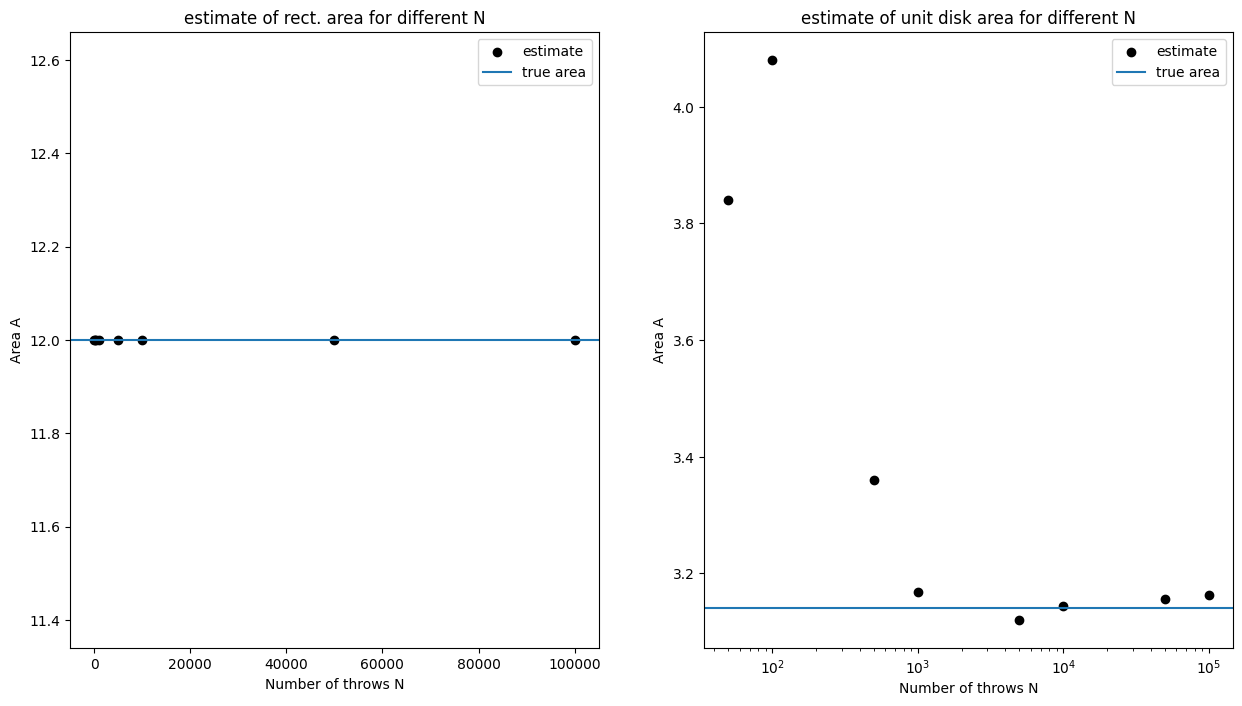

In [4]:
fig,axs= plt.subplots(1,2,figsize=(15,8))

axs[0].set_title("estimate of rect. area for different N")
axs[0].scatter(N,rec, color= "black",label= "estimate")
axs[0].axhline(12, label = "true area")
axs[0].set_ylabel("Area A")
axs[0].set_xlabel("Number of throws N")

axs[1].set_title("estimate of unit disk area for different N")
axs[1].scatter(N,circle, color= "black",label= "estimate")
axs[1].axhline(np.pi, label = "true area")
axs[1].set_ylabel("Area A")
axs[1].set_xlabel("Number of throws N")
plt.xscale("log")
axs[1].legend()
axs[0].legend()

### Exercise 1.2 and 1.3: Inversion Method for a power law
The handwritten calculations required for using the inversion method to sample from a powerlaw distribution can be found in exercise2_handwritten.pdf.
This was then implemented in exercise2.c , points were sampled first from a power law probability distribution with exponent n=3 and  n=4 on the interval [0,1], and then for n=2 on [0,2]. Normalised histograms of the sampled points were plotted along with the true powerlaw distribution they were sampled from. In all three cases they match perfectly.

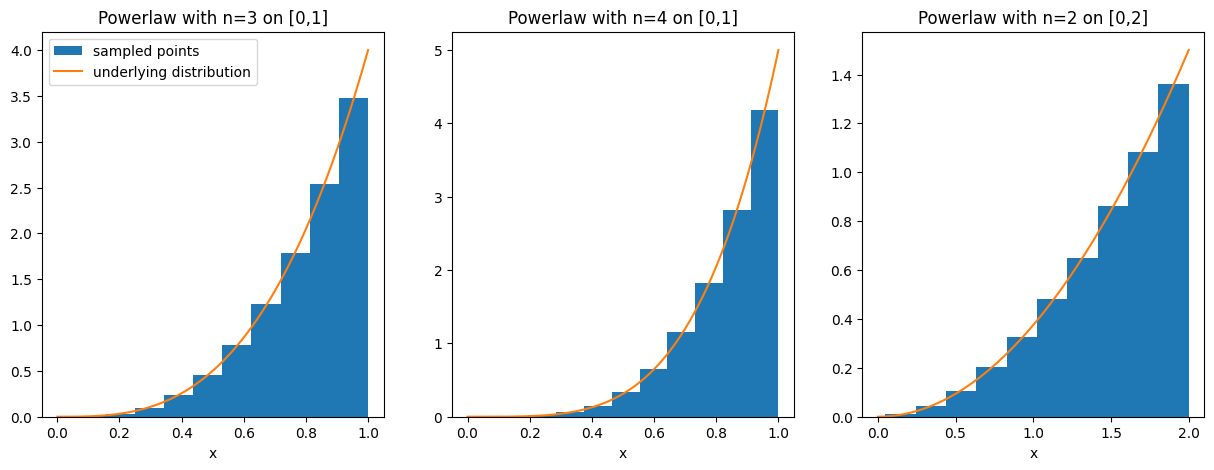

In [5]:
data2=[]
n1=3
n2=4
with open('data2.csv') as csvfile:
    
    content = csv.reader(csvfile, delimiter=";")
    next(content)#skip header line
    for row in content:

        data2.append(np.asarray(row).astype('float64'))
points_3=data2[0]
points_4=data2[1]
points_2= data2[2]

fig, axs =plt.subplots(1,3,figsize=(15,5))

axs[0].set_title("Powerlaw with n=3 on [0,1]")
axs[0].hist(x=points_3, density = True, label ="sampled points")
axs[0].set_xlabel("x")
x=np.linspace(0,1,1000)
axs[0].plot(x, x**(n1)*(n1+1), label= "underlying distribution")

axs[1].set_title("Powerlaw with n=4 on [0,1]")
axs[1].hist(x=points_4, density = True)
x=np.linspace(0,1,1000)
axs[1].plot(x, x**n2*(n2+1))
axs[1].set_xlabel("x")

axs[2].set_title("Powerlaw with n=2 on [0,2]")
axs[2].hist(x=points_2, density = True)
x=np.linspace(0,2,1000)
axs[2].plot(x, x**2*3/8)
axs[2].set_xlabel("x")
axs[0].legend()
plt.show()